In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

# Today: 
# Unsupervised ML - The Search for Structure in a Chaotic World/Embeddings

## _“You shall know a word by the company it keeps”_

# $ \\ $

## We will ultimately focus mostly on supervised ML in this course
- ## Predict the next value in a sequence:
    - ### Next word in a sentence
    - ### Next return in a traded market
- ## Facial recognition, object identification (cat/dog/pineapple/bus....)
# $ \\ $
## __Labled data is very precious and expensive__
## __The world is full of unlabeled data__
# $ \\ $

## What do we do in a situation with data but no labels? What would like we do with this data?
- ## Learn language structures and rules without labeling them
- ## Learn market structures/factors:
    - ### Break stocks into sectors based solely on returns
    - ### Break stocks into sectors based on Financial Statements
- ## Detect fraud in credit card transactions
- ## Look for deep, previously unrecognized structures connecting seemingly disparate areas
    - #### Holy Grail!

# $ \\ $
# $ \\ $
# $ \\ $

# How do we proceed?
 - ## Do exploratory data analysis (*i.e.* look at the damn data!!!!!!!)
   - ## Recall: NLP is useful for data collection, enrichment, `exploration`
        - #### Q: For the Wise: Is Data-Snooping/pHacking an issue?
 - ## With luck, we will learn something sensible that can be use for other (supervised) problems
     - #### See Q above about squeezing the data until it confesses!

# $ \\ $
## The idea:
 - ## Take a collection {set} of data that describe an area of interest
   - ## {Returns on the US Equity Market}
   - ## {Returns on the US Energy Market}
   - ## {Financial statements from large numbers of companies}
   - ## {Credit card transactions}
   - ## {Your Favorite Data Set!}
   - ## ...
 - ## We will look for latent (hidden) structures between and among the different objects in each set 
 - ## We anticipate that these latent structures will reveal useful information about the objects in the set
    - #### or if we are lucky, the world in general

# $ \\ $
# $ \\ $
# Dimensional Reduction

## Key assumptions:
- ## The components of the data set __MUST__ share some common, as yet unknown characteristics
- ## The data set must be rich enough to exhbit these structures
    - ### We cannot deduce the structure of an entire language from a single sentence
- ## These structures are do not evolve (time-stationary)
    - ### Under certain condtions, we can relax this assumption (not explored here - very advanced!)
# $ \\ $
## We start with high-dimensional data:
- ## Every reported trade tick on 1,000 most liquid US Equities for the last 2 years
    - ## Yields a raw matrix of rough size $(2\times 10^9,1000)$
    - ### At least 2 orders of magnitude larger if we include all book updates!
- ## 10K's for all companies in the Russell 3,000 across the last 20 years
# $ \\ $
## Compress these large, multi-dimensional data sets into something we can "sorta, kinda, maybe" visualize, or at least manipulate. 
- ## Compression technique should correspond to the natural (known) structure of the problem!
- ## Use these structural elements to identify *peculiar* data
- ## Maybe use them to make predictions? To Be Determined! Stay tuned

# $ \\ $
# $ \\ $
# Basic ideas:
## Basic techniques outlined early in the 20th century
## Want to  "group" the datasets into a smaller set of "features" that capture the essence of the problem
# $ \\ $
# Classical Techniques
## These still work surprisingly well in many circumstances!
## Clustering
- ### Group similar items into a few "clusters" (Whatever this means!)
## PCA
- ### Dimensionally reduce the problem by looking at the covariance matrix of the elements
    - ### Select a few of the "largest" eigenvectors of this matrix
    - ### Recent version of PCA extend the classical model for nonlinear effects (we won't touch on these!)
# $ \\ $
## One problem with these classical techniques: they ignore the time-sequence elements of the text.
## They sorta kinda work for BOW, but are inadequate for decisions about context, for generating text, or for doing
## all the myriad tasks we would like a good LLM to perform. That said, in a restricted context, like analyzing 10K's, 
## they are adequate for addressing basic questions.
## If BOW loses all contextual information (time-series/casuality), they we cannot expect a dimensional reduction technique based on BOW to do any better.
# $ \\ $

# ML Techniques
## Autoencoder (AE)
- ### Use a NN to encode high-dimensional information into a lower-dimensional structure
- ### AE turns out to be give the same results as PCA
- ### AEs started out with great promise, but that didn't pan out
- ### We will use them to study....
## Variational Autoencoder (VAE)
- ### Use a similar architecture to an AE, with key difference that they "normalize" the input data
- ### Dimensional reduction can be thought of as an "embedding" [KEY FOR word2vec]
- ### Nonlinear effects are much more interesting
- ### Can be used to make predictions

# $ \\ $
- #### Both AE and VAE can deal with context, that is, both are capable of dealing with word-order
- #### No longer need BOW - we can go to a compressed, context-dependent representation (EMBEDDING!)
- #### We will discuss embeddings in greater detail in subsequent lectures. Consider this a foretaste 
- #### I will briefly discuss autoencoders, but VAE are beyond the scope of this class

# $ \\ $
# Simplest Approach: Clustering
## We start with the simplest, most basic model ___KISS___
- ### Recall we are experimenting and looking at the data!
## _Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some specific sense defined by the analyst) to each other than to those in other groups (clusters)._

## _It is a main task of exploratory data analysis, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning._
- ## Wikipedia definition!
# $ \\ $

## _Nota bene_
 - ### We haven't defined what "similar" means
 - ### So we can't say precisely what a "cluster" or "group" is.

# Trivial examples

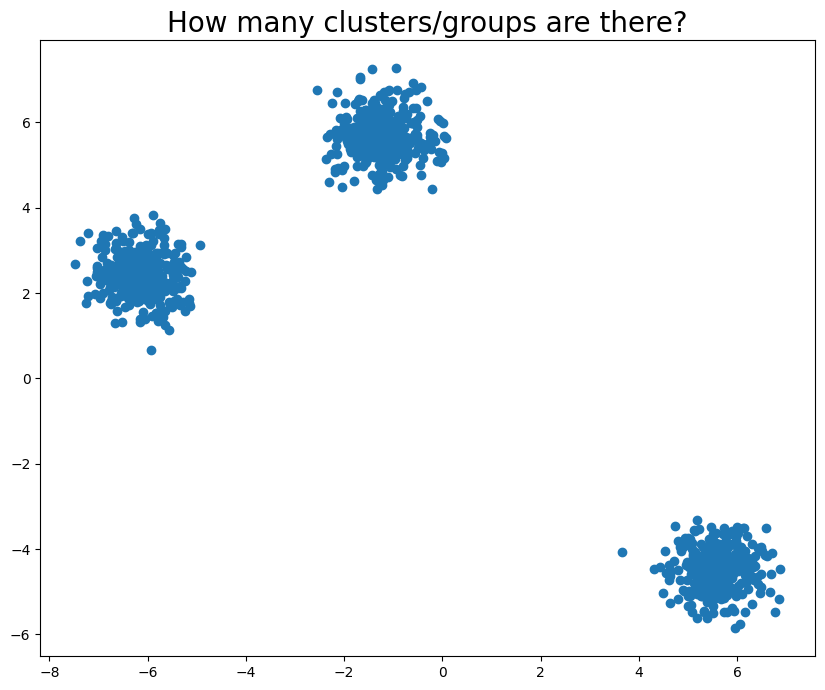

In [2]:
from sklearn.datasets import make_moons, make_blobs, make_circles

n_samples = 1000
random_state = 1234
colors = "rgbcmyk"

x, y = make_blobs(
    n_samples=n_samples, cluster_std=[0.5, 0.5, 0.5], random_state=random_state
)
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1])
plt.title("How many clusters/groups are there?", fontsize=20);

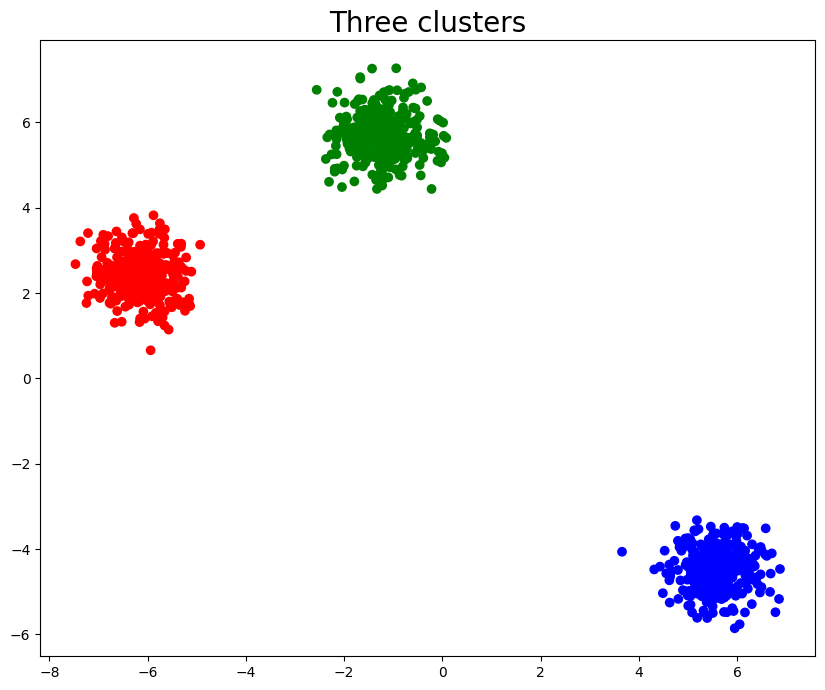

In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], color=[colors[l] for l in y])
plt.title("Three clusters", fontsize=20);

# Oh, if only it were always this easy!

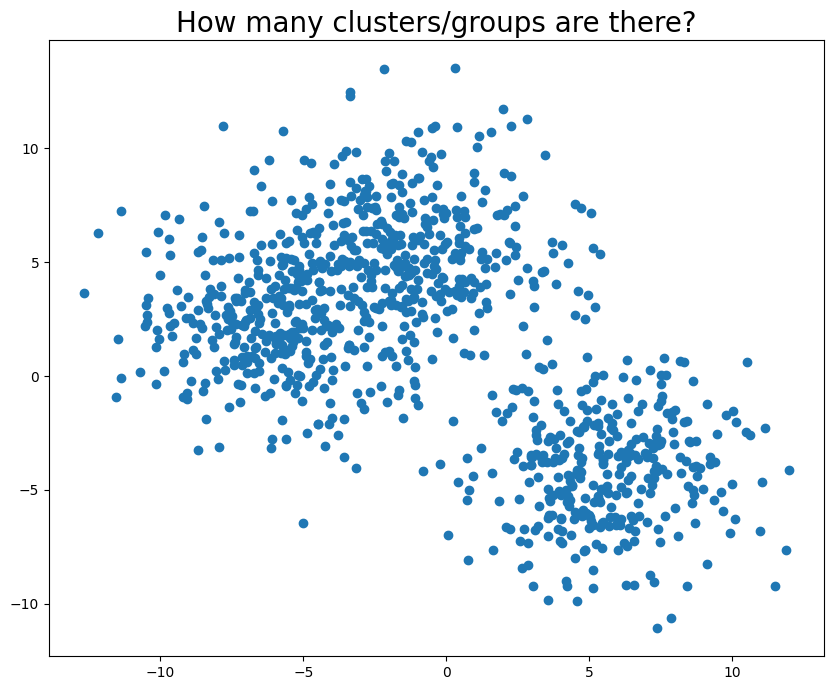

In [4]:
x, y = make_blobs(
    n_samples=n_samples, cluster_std=[2.5, 2.5, 2.5], random_state=random_state
)
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1])
plt.title("How many clusters/groups are there?", fontsize=20);

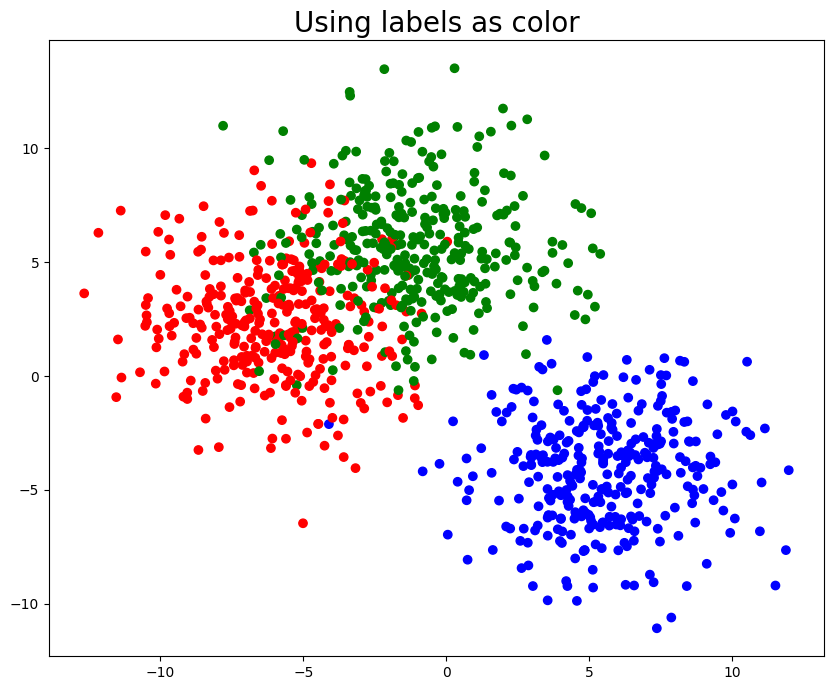

In [5]:
x, y = make_blobs(
    n_samples=n_samples, cluster_std=[2.5, 2.5, 2.5], random_state=random_state
)
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], color=[colors[l] for l in y])
plt.title("Using labels as color", fontsize=20);

# And our eyes can definitely deceive us... 

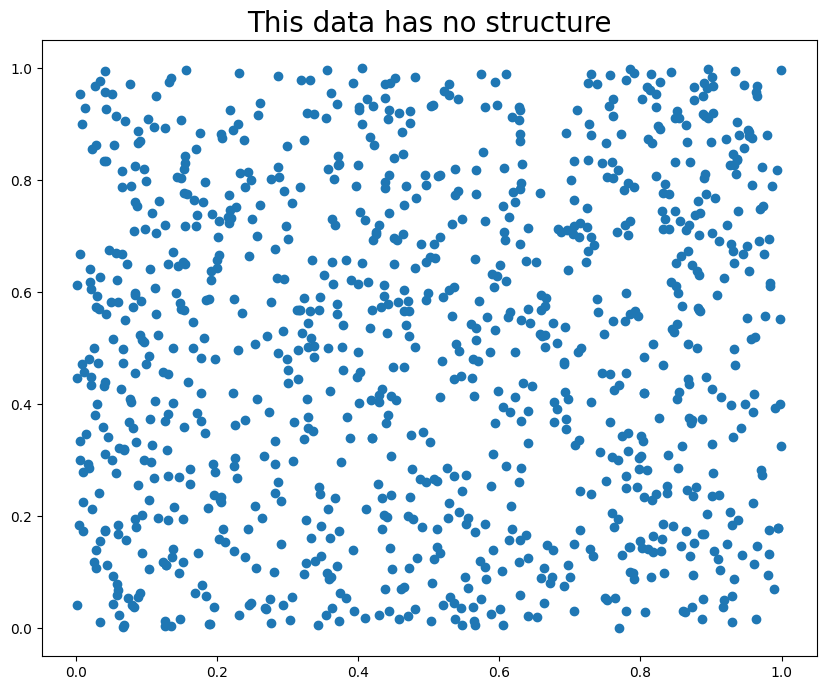

In [6]:
no_structure = np.random.rand(n_samples, 2)
plt.figure(figsize=(10, 8))
plt.scatter(no_structure[:, 0], no_structure[:, 1])
plt.title("This data has no structure", fontsize=20);

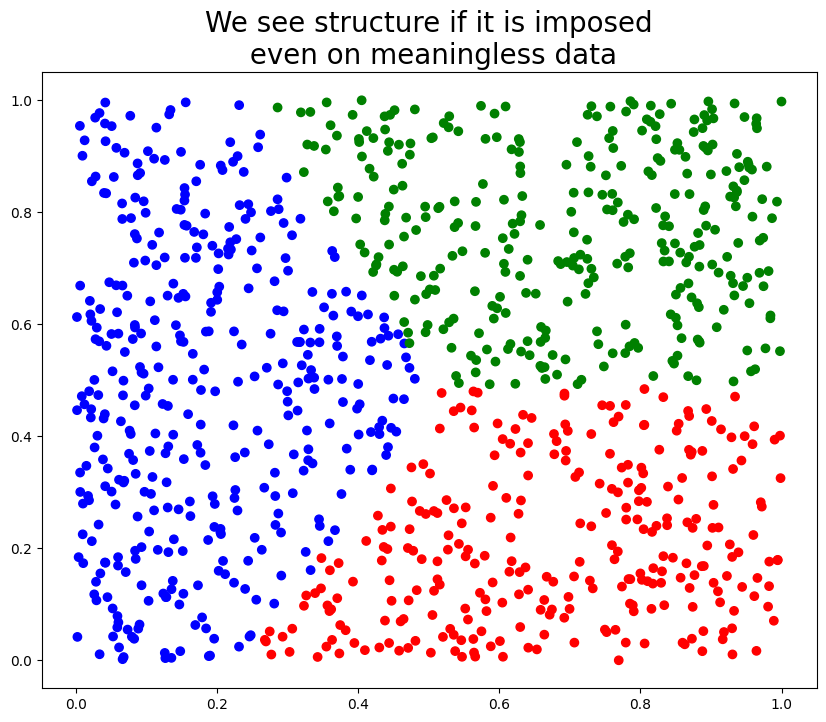

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3).fit(no_structure)
plt.figure(figsize=(10,8))
plt.scatter(no_structure[:, 0], no_structure[:, 1], color=[colors[l] for l in km.labels_]);
plt.title('We see structure if it is imposed\n even on meaningless data', fontsize=20);

### __Let this be a warning - you can pHack even here__

# Goal of clustering isn't well-defined
- ## In the mathematical sense; obviously we want to choose "good" clusters, and will know it when we see it!
# $ \\ $
# What goal should we choose?
# $ \\ $
# Hint: `loss function` is another word for goal
- #### The `loss function` is a crucial part of ML.
- #### How we define it and how we use it will determine the success of any project
# $ \\ $
# Simplest: 
 - ## Assume there are $N$ (given) groups
 - ## Find these groups such that the MSE of every point to the middle of the group is a minimum
 - ## _i.e.,_ minimize
 - # $$ J = \frac{1}{N}\sum_{i=1}^{N}\left(c_i - x_i \right) ^{2}$$ 
## where 
 - ## $N$ is the number of data points
 - ## $x_i$ is the i$^{th}$ data point
 - ## $c_i$ is the cluster center of the cluster to which $x_i$ belongs



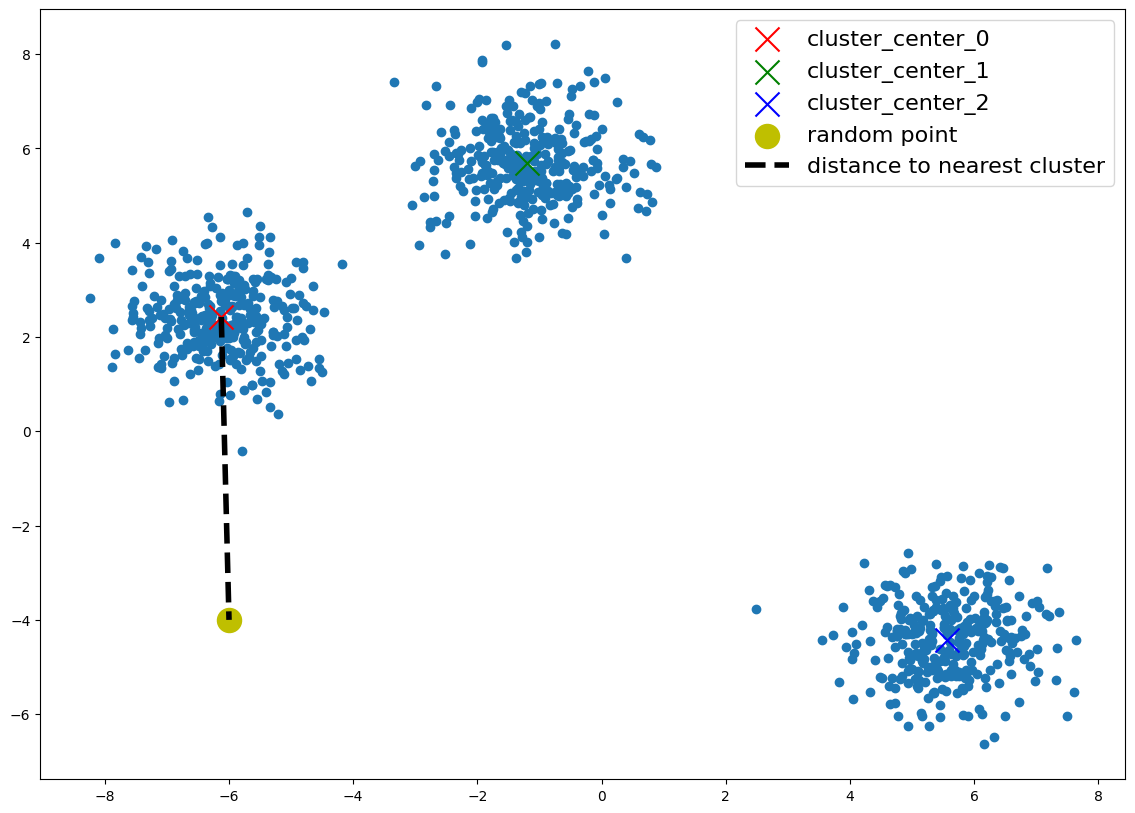

In [8]:
x, y = make_blobs(n_samples=n_samples, cluster_std=[0.8] * 3, random_state=random_state)

centers = []
for l in range(3):
    mask = y == l
    centers.append((x[mask, 0].mean(), x[mask, 1].mean()))

plt.figure(figsize=(14, 10))
plt.scatter(x[:, 0], x[:, 1])

for i, c in enumerate(centers):
    plt.scatter(
        c[0],
        c[1],
        marker="x",
        s=300,
        color=colors[i],
        label="cluster_center_{}".format(i),
    )


random_pt = (-6, -4)
nearest_cluster_id = ((np.array(centers) - random_pt) ** 2).sum(axis=1).argmin()
nearest_center = centers[nearest_cluster_id]
plt.scatter(
    random_pt[0], random_pt[1], marker="o", s=300, color="y", label="random point"
)


plt.plot(
    [nearest_center[0], random_pt[0]],
    [nearest_center[1], random_pt[1]],
    color="black",
    linestyle="--",
    linewidth=4,
    label="distance to nearest cluster",
)

plt.legend(fontsize=16);

## Alternative for above figure

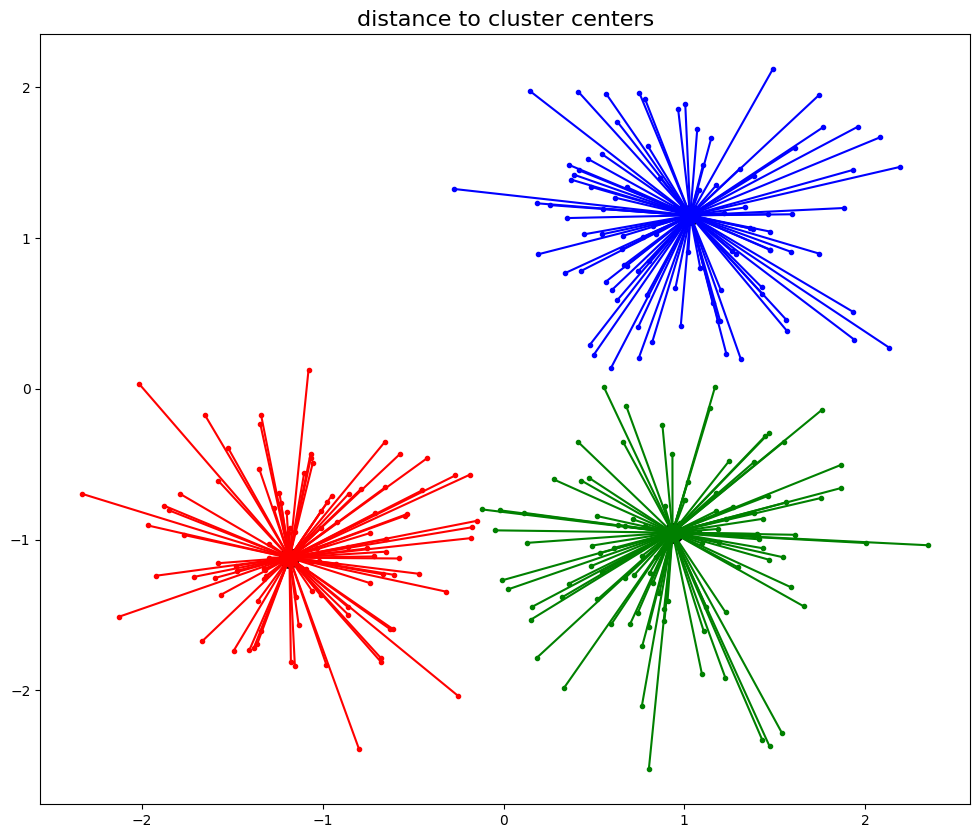

In [9]:
from sklearn.cluster import AffinityPropagation
from itertools import cycle


# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
plt.figure(figsize=(12, 10))
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("distance to cluster centers", fontsize=16);

# $ \\ $
## In the simplest case, we can take the j$^{th}$ cluster center to be the mean of all the points that belong to cluster $j$
# $ \\ $
# This is called `K-means`
## The K-means algorithm chooses cluster centers that minimize the within-cluster sum-of-squares criterion:
# $$\sum_{i=1}^{N} \underset{\mu_{j} \in c}{\mathrm{min}}||x_i -\mu_j ||^{2}$$
## where
 - ## $N$ is the number of data points
 - ## $\mu_j$ is the mean of all the sample in cluster $j$

# $ \\ $
# HOW we optimize a loss function isn't always important
 - ## But in this case it is interesting

# $ \\ $
# Solving K-means is an iterative problem:
 - ## Pick random cluster centers
 - ## find the membership of each data point
 - ## calculate new cluster centers based on new membership
 - ## Stop when no membership changes
# $ \\ $

In [2]:
from IPython.display import HTML
from matplotlib import animation


def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]


def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    return np.argmin(distances, axis=0)


def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array(
        [points[closest == k].mean(axis=0) for k in range(centroids.shape[0])]
    )


points, y = make_blobs(
    n_samples=n_samples, cluster_std=[2.0] * 3, random_state=random_state
)

# create a simple animation
fig = plt.figure(6006, figsize=(12, 12))
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
global centroids
centroids = initialize_centroids(points, 3)


def init():
    return (ax,)


def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c="r", s=100)
    return (ax,)


anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=20, interval=300,
)

NameError: name 'make_blobs' is not defined

In [11]:
HTML(anim.to_jshtml())

# $ \\ $
# $ \\ $
# $ \\ $
---
# Real World Example!
---
# $ \\ $
# $ \\ $
# $ \\ $

# Let's use K-means on some natural language
## Let's look at the s1 section of all r3k 10-k filings
- ## Naively and arbitrarily assume there are 10 topics present 
- ## We do brute-force analysis. I mean, what could possibly go wrong?

In [12]:
# safe to restart
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(1234)

import json

In [13]:
%%time
with open('r3k-2016.json') as fi:
    data = json.load(fi)
r3k_data = [item for item in data if 's1' in item and '2016' in item['filing_date']]
d = [item['s1'] for item in r3k_data]
tickers = [item['ticker'] for item in r3k_data]
del data
r3k_data = d
len(r3k_data)

CPU times: user 821 ms, sys: 238 ms, total: 1.06 s
Wall time: 1.21 s


2284

In [14]:
print(r3k_data[0][:1500].replace('\n\n', '\n'))

Item 1. Business
  

Overview
  

Agilent Technologies Inc. ("we", "Agilent" or the "company"), incorporated in Delaware in May 1999, is a global leader in life sciences, diagnostics and applied chemical markets, providing application focused solutions that includes instruments, software, services and consumables for the entire laboratory workflow.
  

On November 1, 2014, we completed the distribution of 100% of the outstanding common shares of Keysight Technologies, Inc. ("Keysight") to Agilent stockholders who received one share of Keysight common stock for every two shares of Agilent held as of the close of business on the record date, October 22, 2014. The historical results of operations and the financial position of Keysight are included in the consolidated financial statements of Agilent and are reported as discontinued operations within this Form 10-K.
  

For fiscal year ended October 31, 2016, we have three business segments comprised of the life sciences and applied markets

## We need to turn words into numbers to use this algorithm

In [15]:
%%time 
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(lowercase=True, max_features=10000, max_df=0.95, min_df=2)
x = vec.fit_transform(r3k_data)
x.shape

CPU times: user 5.28 s, sys: 70 ms, total: 5.35 s
Wall time: 5.35 s


(2284, 10000)

In [16]:
from sklearn.cluster import KMeans

## If you want to see the help file for KMeans, please uncomment the next line!
# KMeans?

In [17]:
%%time
# takes ~0.5s of Wall Clock Time

km = KMeans(n_clusters=10)
km.fit(x)
km.cluster_centers_.shape

CPU times: user 1.42 s, sys: 268 ms, total: 1.69 s
Wall time: 469 ms


(10, 10000)

# Looking at the results:
 - ## What are our results?
 - ## How should we evaluate our results?
 - ## Did we do anything reasonable? 

# $ \\ $
## We can look at cluster centers
 - ## They live in "word space", which is "weird."

# $ \\ $

In [18]:
def print_cluster_center_words(estimator, vocab, num_words=10):
    centers = pd.DataFrame(estimator.cluster_centers_, columns=vocab).T
    for col in centers.columns:
        print("cluster center {}".format(col))
        biggest = centers[col].abs().nlargest(num_words)
        for word, val in biggest.items():
            print("  {:15s}: {:7.2f}".format(word, val))
        print("\n")


print_cluster_center_words(km, vec.get_feature_names_out(), 10)

cluster center 0
  our            :   21.70
  products       :   19.68
  services       :   14.21
  we             :   13.37
  customers      :   12.62
  sales          :   11.51
  gas            :   10.92
  approximately  :    9.73
  service        :    9.68
  million        :    9.59


cluster center 1
  our            :  237.42
  we             :  159.79
  services       :  102.03
  care           :   97.30
  health         :   93.61
  programs       :   61.85
  medicare       :   56.55
  state          :   51.09
  federal        :   48.21
  program        :   46.88


cluster center 2
  our            :  110.58
  we             :   73.28
  products       :   21.62
  services       :   15.07
  customers      :   12.51
  sales          :   11.28
  product        :   10.12
  us             :    9.83
  development    :    8.15
  service        :    8.15


cluster center 3
  our            :  315.71
  we             :  197.11
  products       :   51.16
  services       :   41.12
  custom

### Look at assigned clusters for companies

In [19]:
for label in range(km.n_clusters):
    print(label,'\n')
    t = [tickers[i] for i, lab in enumerate(km.labels_) if label == lab]
    print(t)
    print("\n\n")

0 

['AAON', 'AAPL', 'ABBV', 'ABT', 'ADNT', 'AEE', 'AEP', 'AFG', 'AGR', 'AGX', 'AGYS', 'AIR', 'AIT', 'ALCO', 'ALE', 'ALEX', 'ALG', 'ALL', 'ALX', 'AMAT', 'AMBC', 'AMOT', 'AMWD', 'AMZN', 'ANDE', 'ANF', 'ANSS', 'AOS', 'APH', 'APLE', 'APPS', 'ARI', 'ARL', 'ARW', 'ASH', 'ASTE', 'ATRO', 'ATSG', 'AVCO', 'AVD', 'AVT', 'AVXL', 'AVY', 'AWR', 'AXE', 'AYI', 'AZZ', 'B', 'BAC', 'BAX', 'BBBY', 'BC', 'BCPC', 'BDX', 'BELF.B', 'BFS', 'BGG', 'BH', 'BK', 'BKE', 'BLD', 'BMI', 'BMRC', 'BOH', 'BOOM', 'BRC', 'BRK.B', 'BRO', 'BWA', 'BXC', 'CAG', 'CAMP', 'CASY', 'CAT', 'CATO', 'CBB', 'CBL', 'CBSH', 'CBZ', 'CCF', 'CDE', 'CDR', 'CGNX', 'CHD', 'CHE', 'CIX', 'CKH', 'CL', 'CLFD', 'CLI', 'CLX', 'CMO', 'CMS', 'CNA', 'CNBK.A', 'CNS', 'COOP', 'CPB', 'CPK', 'CPT', 'CRD.A', 'CRMT', 'CRS', 'CRVL', 'CRY', 'CSL', 'CTAS', 'CTB', 'CTBI', 'CTS', 'CUZ', 'CVLY', 'CVM', 'CVX', 'CW', 'CWEN', 'CWEN.A', 'CXP', 'CZNC', 'D', 'DAN', 'DBD', 'DCI', 'DDS', 'DE', 'DHIL', 'DJCO', 'DRE', 'DRQ', 'DTE', 'DUK', 'EBF', 'EBIX', 'ED', 'EE', 'EGP', 

# Some of this makes sense. But there is lots of room for improvement!
# How can we improve things?
# $ \\ $
# KMeans makes assumptions about the data
# $ \\ $
## Recall, the loss function
# $$ J = \frac{1}{N}\sum_{i=1}^{N}\left(c_i - x_i \right) ^{2}$$ 
# $ \\ $
## This loss function tacitly assumes:
 - ## The data are isotropically distributed (ie all the directions in the data are the same) 
 - ## Features have similar variance
 - ## Blobs are roughly the same size

## This is easier to visualize in 2D

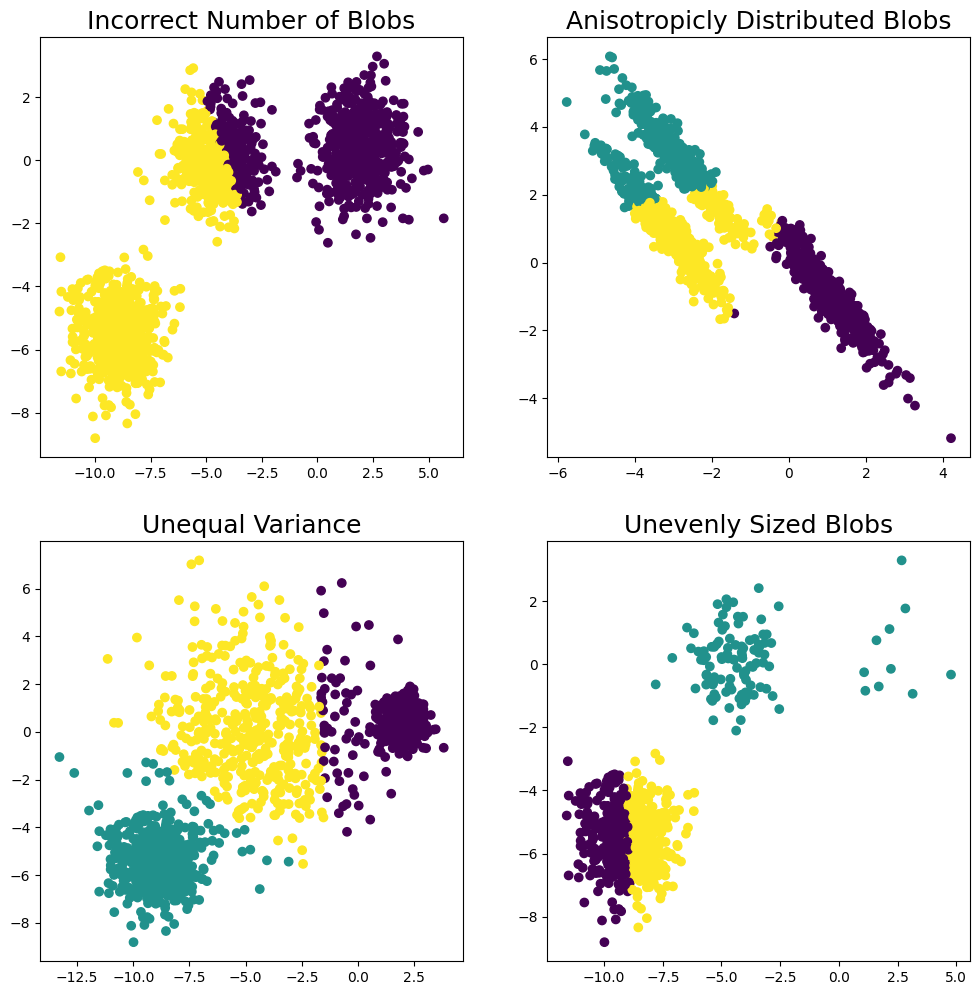

In [20]:
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs", fontsize=18);

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs", fontsize=18);

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance", fontsize=18);

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs", fontsize=18);

# $ \\ $
# $ \\ $
# Two options: 
 - ## Fix the data
 - ## Use a different model if your data looks like any of these
# $ \\ $
# $ \\ $
## Some of this can be fixed easily

In [21]:
from sklearn.preprocessing import normalize
## Uncomment the next line if you want to see the help file for normalize
# normalize?

In [22]:
vec2 = CountVectorizer(lowercase=True, max_features=10000, min_df=2, max_df=0.95)
x2 = vec2.fit_transform(r3k_data)

km2 = KMeans(n_clusters=5).fit(normalize(x2, axis=1))
print_cluster_center_words(km2, vec2.get_feature_names_out())

cluster center 0
  our            :    0.56
  we             :    0.35
  products       :    0.10
  services       :    0.08
  customers      :    0.06
  sales          :    0.05
  us             :    0.05
  product        :    0.04
  believe        :    0.04
  service        :    0.04


cluster center 1
  products       :    0.14
  our            :    0.09
  sales          :    0.08
  services       :    0.07
  customers      :    0.07
  million        :    0.06
  approximately  :    0.06
  gas            :    0.05
  service        :    0.05
  we             :    0.05


cluster center 2
  we             :    0.34
  our            :    0.33
  product        :    0.18
  clinical       :    0.18
  fda            :    0.17
  drug           :    0.14
  products       :    0.13
  patients       :    0.12
  development    :    0.10
  approval       :    0.10


cluster center 3
  bank           :    0.41
  capital        :    0.28
  act            :    0.17
  federal        :    0.17
  bankin

## In fact, can improve our text representation even more?


# $ \\ $
# $ \\ $
# $ \\ $


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

vec2 = TfidfVectorizer(lowercase=True, max_features=10000, stop_words='english', max_df=0.95, min_df=2)
x2 = vec2.fit_transform(r3k_data)

km2 = KMeans(n_clusters=5).fit(normalize(x2, axis=1))
print_cluster_center_words(km2, vec2.get_feature_names_out())

cluster center 0
  bank           :    0.43
  loans          :    0.21
  banking        :    0.17
  capital        :    0.16
  loan           :    0.13
  holding        :    0.11
  fdic           :    0.11
  institution    :    0.11
  banks          :    0.10
  federal        :    0.10


cluster center 1
  insurance      :    0.05
  properties     :    0.04
  services       :    0.04
  investment     :    0.03
  estate         :    0.03
  stores         :    0.03
  real           :    0.03
  december       :    0.03
  31             :    0.03
  property       :    0.03


cluster center 2
  gas            :    0.31
  oil            :    0.18
  natural        :    0.17
  drilling       :    0.12
  wells          :    0.08
  proved         :    0.08
  production     :    0.07
  reserves       :    0.06
  energy         :    0.06
  pipeline       :    0.05


cluster center 3
  products       :    0.12
  customers      :    0.07
  services       :    0.06
  sales          :    0.06
  soluti

## As an exploratory tool, clustering can help us look at high-dimensional data
# $ \\ $
# $ \\ $
# $ \\ $
# How do we measure the performance of these algorithms?
 - ## Examining cluster centers and confirming that they make sense isn't very quantitative. 

# $ \\ $
# $ \\ $
# Two types of metrics: 
 - ## Where we have some true labels
 - ## Where we have no true labels

# $ \\ $
# $ \\ $
## Why do we need new metrics?
 - ## E.g. calculate f1 of true labels and assigned clusters? 

# $ \\ $
# What's wrong with this? 
# $ \\ $
# $ \\ $
# $ \\ $
 - ## What if we have the wrong number of classes? 
 - ## What if we jumble our classes? 

## We need metrics that can handle these
 - ## NB: while these won't throw errors, it's probably not what we want!

In [24]:
from sklearn.metrics import f1_score
f1_score(["a", "b", "a", "c"], ["a", "b", "c", "d"], average="micro")

0.5

In [25]:
# a->b, b->c, c->d, d->a
f1_score(["a", "b", "a", "c"], ["b", "c", "b", "a"], average="micro")

0.0

# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# Question: are the cluster centers close to one another?

# $ \\ $
# $ \\ $


In [26]:
km2.cluster_centers_.shape

(5, 10000)

In [27]:
from sklearn.metrics import euclidean_distances
pd.DataFrame(euclidean_distances(km2.cluster_centers_))

0         1         2         3         4
0  0.000000  0.696294  0.882582  0.777700  0.889738
1  0.696294  0.000000  0.518706  0.273989  0.530160
2  0.882582  0.518706  0.000000  0.547502  0.724677
3  0.777700  0.273989  0.547502  0.000000  0.525357
4  0.889738  0.530160  0.724677  0.525357  0.000000

# $ \\ $
# $ \\ $
## Is that close?
# $ \\ $
# $ \\ $
# What do we expect the distance to be between two random points?

Text(0.5, 1.0, 'Distance Between 2 Random Points on [0,1)\nMean=0.34')

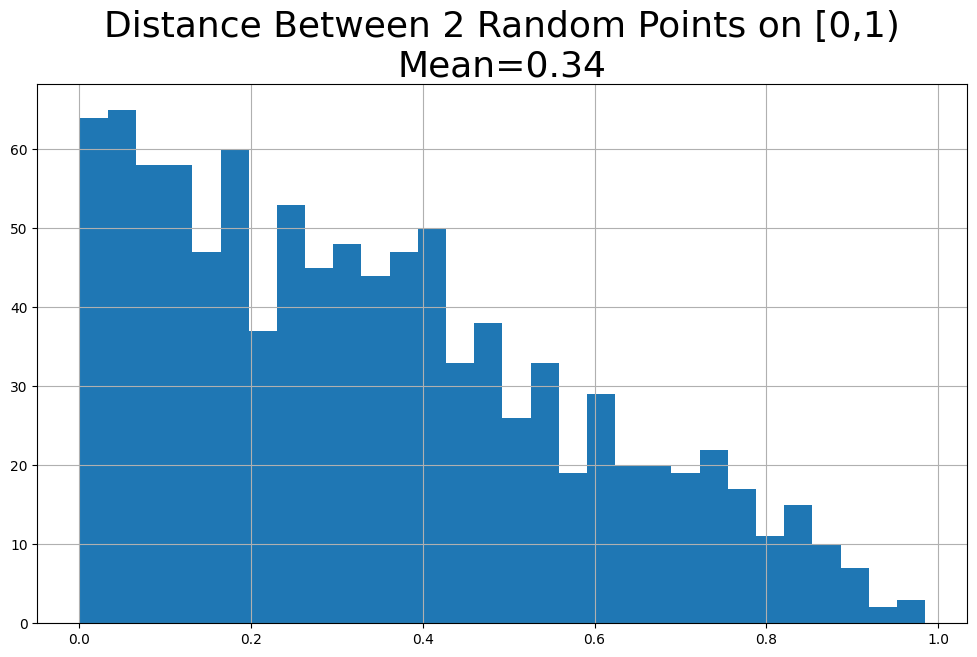

In [28]:
a = np.linalg.norm(np.diff(np.random.uniform(size=(1000, 2)), axis=-1), axis=-1).squeeze()
plt.figure(figsize=(12,7))
pd.Series(a).hist(bins=30,)
mean_dist = a.mean()
plt.title('Distance Between 2 Random Points on [0,1)'
          '\nMean={:.2f}'.format(mean_dist), fontsize=26)

# What about in 2d? 100d? 10000d? 

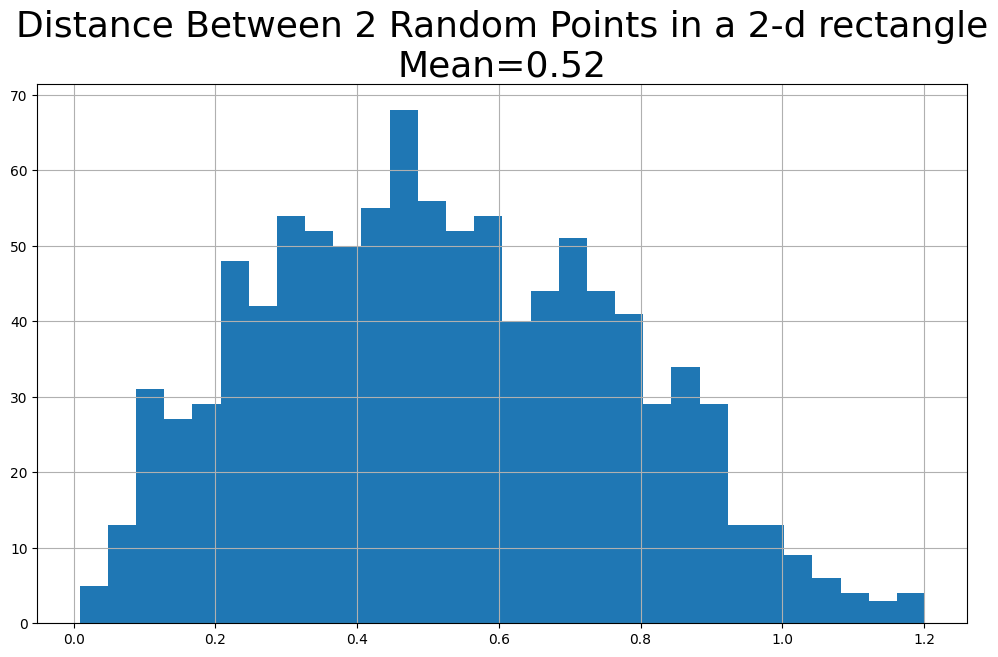

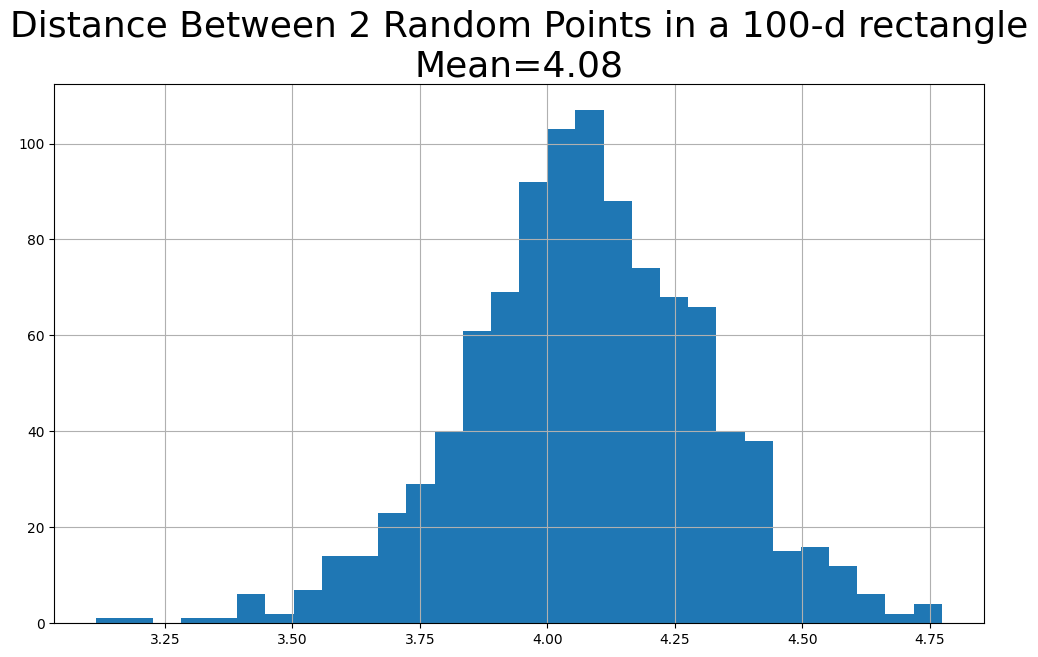

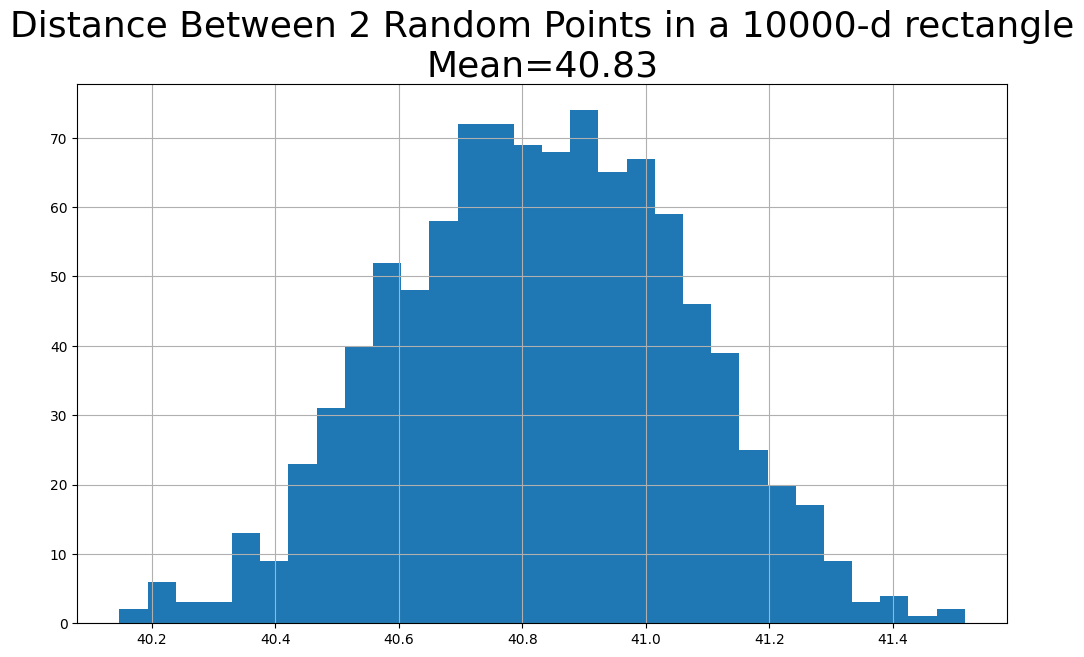

In [29]:
for dim in (2, 100, 10000):
    a = np.linalg.norm(np.diff(np.random.uniform(size=(1000, dim, 2)), axis=-1).squeeze(), axis=-1).squeeze()
    plt.figure(figsize=(12,7))
    pd.Series(a).hist(bins=30,)
    mean_dist = a.mean()
    plt.title('Distance Between 2 Random Points in a {}-d rectangle'
              '\nMean={:.2f}'.format(dim, mean_dist), fontsize=26)

# $ \\ $
# $ \\ $
# This is called the curse of dimensionality
 - ## High dimensional data is really hard to work with because it's sparse

# $ \\ $
# $ \\ $
## BOW / TFIDF is a very sparse representation
# $ \\ $
# $ \\ $

# Notice in our old example:
 - ## The cluster centers are pretty close to one another
 - ## The cluster centers are highly correlated

In [30]:
np.round(100*pd.DataFrame(km.cluster_centers_, columns=vec.get_feature_names_out()).T.corr(), 1)

0      1      2      3      4      5      6      7      8      9
0  100.0   61.3   72.2   63.4   67.3   54.1   45.2   71.4   53.6   48.4
1   61.3  100.0   80.5   79.5   79.7   62.8   34.3   76.4   51.2   40.8
2   72.2   80.5  100.0   98.6   99.3   71.5   34.2   89.4   52.3   35.4
3   63.4   79.5   98.6  100.0   99.5   70.0   29.4   85.8   48.8   30.9
4   67.3   79.7   99.3   99.5  100.0   69.2   30.7   86.7   49.8   32.5
5   54.1   62.8   71.5   70.0   69.2  100.0   24.5   62.5   37.2   27.3
6   45.2   34.3   34.2   29.4   30.7   24.5  100.0   45.1   88.3   72.9
7   71.4   76.4   89.4   85.8   86.7   62.5   45.1  100.0   60.7   47.0
8   53.6   51.2   52.3   48.8   49.8   37.2   88.3   60.7  100.0   92.1
9   48.4   40.8   35.4   30.9   32.5   27.3   72.9   47.0   92.1  100.0

# $ \\ $
# What does this tell us? 
 - ## Our featurization is poor!
     - ### We're not making efficient use of the 10,000-dimensional space
 - ## Clustering cares a lot about how we represent the data
 - ## Our clusters aren't particularly meaningful

# $ \\ $
# $ \\ $
# How can we improve the representation (reduce the sparseness)?

# $ \\ $
# $ \\ $
# $ \\ $

# Dimensionality Reduction
 - ## Taking high-dimensional data that is difficult to work with
 - ## Finding lower-dimensional representations that are useful and easier to work with.


# $ \\ $
# $ \\ $
# Do we know any dimensionality reduction techniques?
# $ \\ $
# $ \\ $
## Successively more abstract techniques
 - ## PCA
     - ### Fast, simple to implement, lots of code already available
     - ### Relatively easy to understand results
 - ## Latent Dirchlet Allocation
    - ### Probabilistic clustering based on word frequency
    - ### Mathematically simple, computationally a bit harder than PCA
 - ## Embeddings: finding "better" vector representations for words
     - ## Autoencoders/Variational Auto Encoders (AE/VAE)
  
## We won't have time to explore all of these!


## Embeddings - the low-dimensional representation of words and context - underpin all of the latest NLP

# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $

# Principal Component Analysis (PCA)
# $ \\ $
## Idea for compressing dimensions: 
### Without either labels or a downstream task, we will choose the directions over which the data vary the most!

In [31]:
# safe to restart
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(1234)

from sklearn.decomposition import PCA

# Low-dimensional structure exists in the most surprising places

![](https://apod.nasa.gov/apod/image/2105/NGC4565_CFHT_1779.jpg "Canada France Hawaii Telescope Image of NGC 4565")

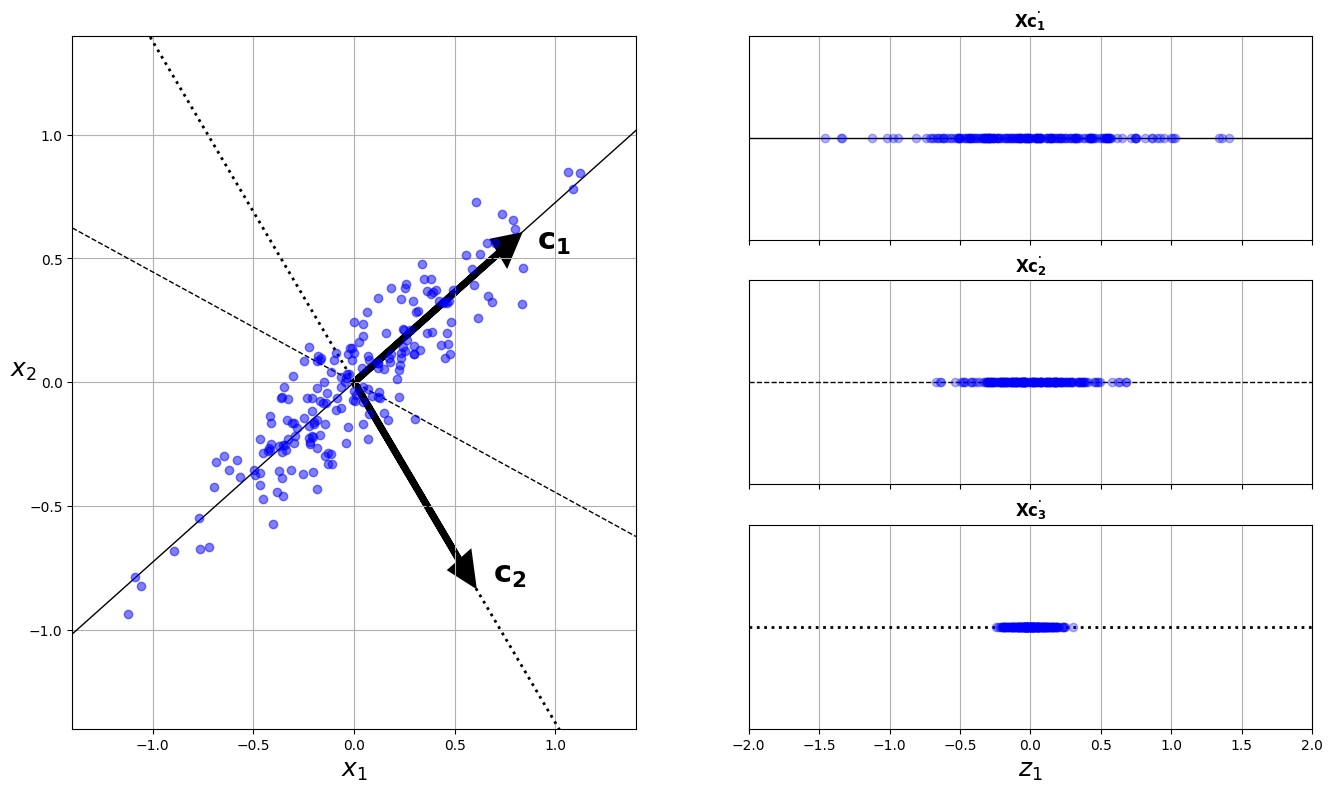

In [32]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(16,9))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)
plt.title(r"$\mathbf{X} \dot \mathbf{c_1}$")

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)
plt.title(r"$\mathbf{X} \dot \mathbf{c_2}$")


plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)
plt.title(r"$\mathbf{X} \dot \mathbf{c_3}$")


plt.show()


# $ \\ $
# What does this look like with words? 
## Recall, in BOW and TFIDF we have

# $$ BOW  = \begin{bmatrix} 
    a_{1,1} & a_{1,2} & \dots & a_{1,N_{WORDS}} \\
    \vdots & \ddots & \\
    a_{N_{DOCS},1} &   \dots &     & a_{N_{DOCS},N_{WORDS}} 
    \end{bmatrix}$$

# $ \\ $
# $ \\ $
# What does it mean to do PCA on this matrix? 
## Cartoon: we're finding words that frequently occur together 
 - ## producing "concepts" out of these words which occur together
 - ## The "principle components" tell us the relevant vectors in word space

# $ \\ $
## This has a fancy name: "Latent Semantic Analysis" 
 - ## This is just PCA on words

# $ \\ $
# $ \\ $
## Let's try it out!

In [33]:
%%time
with open('r3k-2016.json') as fi:
    data = json.load(fi)
data = [item for item in data if 's1' in item and '2016' in item['filing_date']]
d = [item['s1'] for item in data]
tickers = [item['ticker'] for item in data]
del data
r3k_data = d
len(r3k_data)

CPU times: user 821 ms, sys: 163 ms, total: 984 ms
Wall time: 985 ms


2284

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
## Uncomment the next line if you want to see the help file for TruncatedSVD
# TruncatedSVD?

In [35]:
%%time
vec = CountVectorizer(max_features=10000, lowercase=True, max_df=0.95, min_df=2)
x = vec.fit_transform(r3k_data)
x.shape

CPU times: user 5.31 s, sys: 71.3 ms, total: 5.38 s
Wall time: 5.39 s


(2284, 10000)

In [36]:
%%time
svd = TruncatedSVD(16)
svd.fit(x)

CPU times: user 914 ms, sys: 1.22 s, total: 2.14 s
Wall time: 539 ms


TruncatedSVD(n_components=16)

## What should we do now?
 - ## Examine the topics that we learned
 - ## See how well we can reconstruct our data



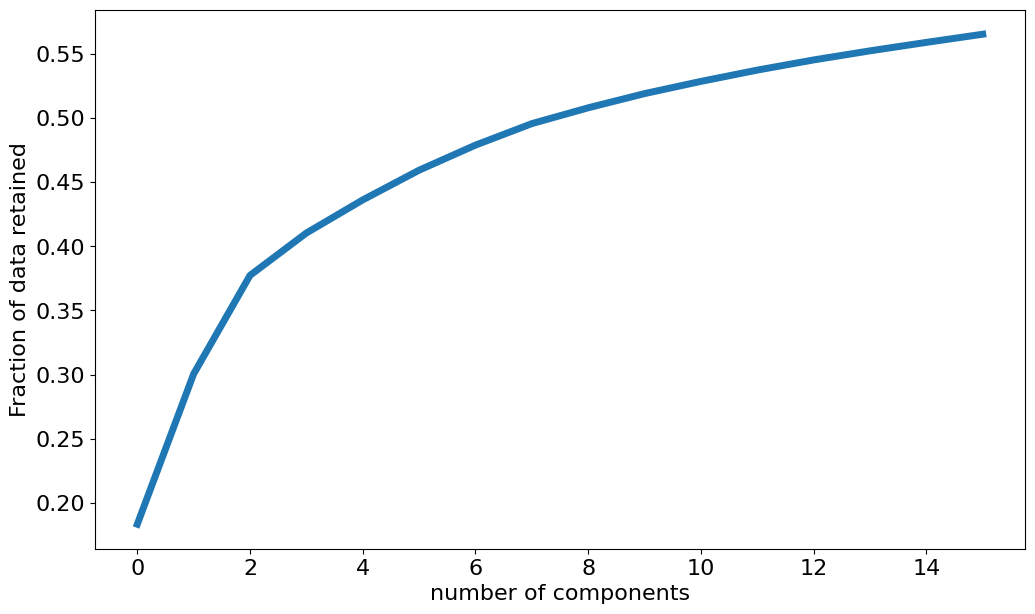

In [37]:
pd.Series(svd.explained_variance_ratio_.cumsum()).plot(figsize=(12,7), fontsize=16, linewidth=5)
plt.xlabel("number of components", fontsize=16);
plt.ylabel("Fraction of data retained", fontsize=16);

##### There is surprisingly little information contained in our data. 
 - ## We can reconstruct ~40% of the variance with just two components

# $ \\ $
# $ \\ $
# $ \\ $
## What is the shape of `svd.components_`?
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $

In [38]:
svd.components_.shape

(16, 10000)

In [39]:
def assemble_components(components, n_largest=30, n_components=3):
    final_comps = pd.DataFrame()
    for nc in np.arange(n_components):
        these_comps = components[nc].loc[lambda x: x.abs().nlargest(n_largest).index].to_frame(f"component_{nc}")
        these_comps[f'words_{nc}'] = these_comps.index
        these_comps.index = [s for s in np.arange(n_largest)]
        desired_columns = [f'words_{nc}', f'component_{nc}']
        these_comps = these_comps.reindex(columns=desired_columns)
        final_comps = pd.concat([final_comps, these_comps], axis=1)
    return final_comps

In [40]:
components_svd_without_stopwords = pd.DataFrame(svd.components_.T, index=vec.get_feature_names_out())
assemble_components(components_svd_without_stopwords, n_largest=10, n_components=4)
# components[0].loc[lambda x: x.abs().nlargest(30).index]

words_0  component_0    words_1  component_1    words_2  component_2  \
0          our     0.664522       bank     0.412299        our     0.372292   
1           we     0.466597      loans     0.339230   clinical    -0.298758   
2     products     0.126724    capital     0.252253    product    -0.262131   
3     services     0.094669        our    -0.215361        fda    -0.261675   
4      product     0.093655       loan     0.205690       drug    -0.228339   
5           us     0.068462         we    -0.169954   patients    -0.221988   
6    customers     0.061534    federal     0.159602   approval    -0.164402   
7        sales     0.060394       risk     0.133839     patent    -0.143286   
8  development     0.060371        act     0.121544  treatment    -0.142685   
9      capital     0.060070  insurance     0.117258      phase    -0.136686   

         words_3  component_3  
0            gas     0.412178  
1        natural     0.277574  
2            oil     0.210398  
3            our    -0.191038  
4         energy     0.181986  
5           bank    -0.174618  
6          power     0.158509  
7     production     0.144022  
8          loans    -0.129919  
9  approximately     0.111178

# $ \\ $
# $ \\ $
# $ \\ $
## So we see components that are roughly
 - ## Consumer finance?
 - ## Finance ?
 - ## Health care
 - ## Oil & Gas

# $ \\ $
# $ \\ $
# Recall: we could reconstruct 40% of our data in two components
 - ## Maybe we're not representing our text right

# $ \\ $
# $ \\ $
## Our text representation will matter
- ## Let's kill off the stop words!

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize


In [42]:
%%time
vec = TfidfVectorizer(max_features=10000, lowercase=True, stop_words="english", min_df=2,max_df=0.95)
x = vec.fit_transform(r3k_data)
x = normalize(x)
svd = TruncatedSVD(32).fit(x)
x_transformed = svd.transform(x)
svd.components_.shape

CPU times: user 6.49 s, sys: 671 ms, total: 7.16 s
Wall time: 6.1 s


(32, 10000)

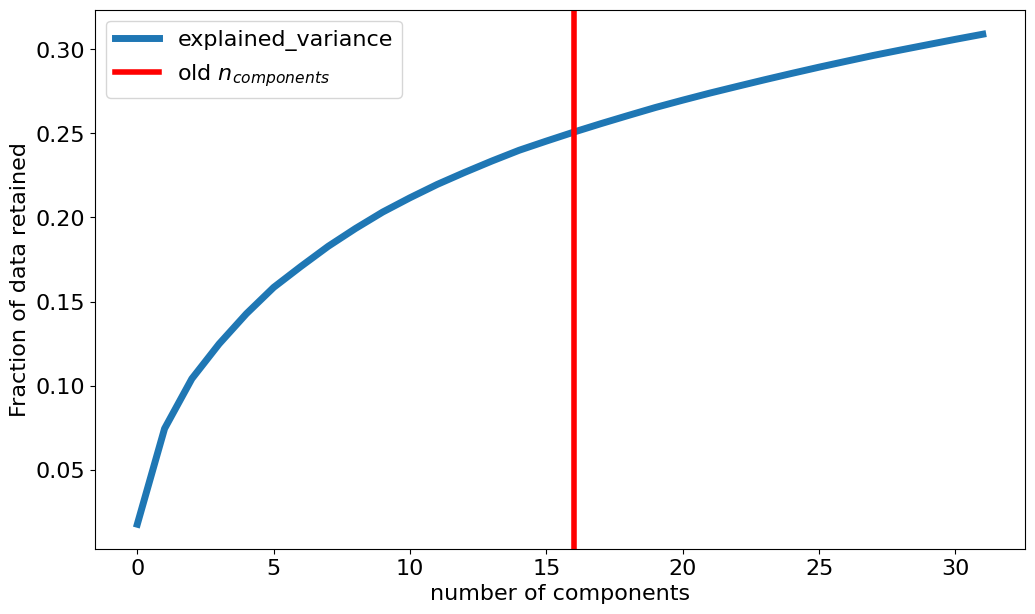

In [43]:
ax = pd.Series(svd.explained_variance_ratio_.cumsum(), name="explained_variance").plot(
    figsize=(12, 7), fontsize=16, linewidth=5
)
ax.axvline(16, color="r", linewidth=4, label="old $n_{components}$")
plt.xlabel("number of components", fontsize=16);
plt.ylabel("Fraction of data retained", fontsize=16);
plt.legend(fontsize=16);

In [44]:
components_svd_with_stopwords= pd.DataFrame(svd.components_.T, index=vec.get_feature_names_out())
assemble_components(components_svd_with_stopwords, n_largest=10, n_components=4)

words_0  component_0      words_1  component_1    words_2  component_2  \
0       bank     0.279863         bank     0.476595   clinical     0.368227   
1   products     0.188300        loans     0.243109        fda     0.359982   
2      loans     0.159573     products    -0.209636       drug     0.259290   
3   services     0.144293      banking     0.181401   patients     0.236222   
4    capital     0.134743      capital     0.149913      trial     0.142555   
5  customers     0.118834         loan     0.141009     trials     0.142514   
6    banking     0.114436      product    -0.124598   approval     0.126557   
7       loan     0.098985         fdic     0.124493      phase     0.115056   
8    product     0.098093      holding     0.121500    product     0.108104   
9  insurance     0.097645  institution     0.114685  treatment     0.107963   

      words_3  component_3  
0  properties     0.307468  
1        bank    -0.226366  
2         gas     0.200449  
3    products    -0.195668  
4        reit     0.159581  
5     tenants     0.153226  
6      estate     0.147731  
7   solutions    -0.136545  
8         oil     0.135856  
9        real     0.120759

# $ \\ $

## There are other approached aimed more specifically at text data such as:
- ### Non-negative matrix factorization (NMF)
- ### Latent Dirichlet Allocation (LDA)

## Simple references on Latent Dirichlet Allocation (Explore to your heart's content, and have fun!)
<nav>
<a href=”https://https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2">A Beginner’s Guide to Latent Dirichlet Allocation(LDA) </a>  AND
<a href=”https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24”>Topic Modeling and Latent Dirichlet Allocation (LDA) in Python</a> 
</nav>

## LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

# $ \\ $
# $ \\ $

In [45]:
from sklearn.decomposition import LatentDirichletAllocation
## Uncomment the next line if you want to see the help file for LatentDirichletAllocation
# LatentDirichletAllocation?

In [46]:
%%time
random_state = 12345
vec = TfidfVectorizer(max_features=10000, lowercase=True, stop_words="english", min_df=2, max_df=0.95)
x = vec.fit_transform(r3k_data)
x = normalize(x)
my_lda = LatentDirichletAllocation(n_components=10, random_state=random_state, learning_offset=10.0)
x_transformed_lda = my_lda.fit_transform(x)

CPU times: user 1min 56s, sys: 2min 24s, total: 4min 21s
Wall time: 33.4 s


In [47]:
components_lda_without_stopwords = pd.DataFrame(my_lda.components_.T, index=vec.get_feature_names_out())
assemble_components(components_lda_without_stopwords, 10, 4)

words_0  component_0        words_1  component_1     words_2  \
0   products   125.348523    tripadvisor     1.745646    clinical   
1       bank   119.955008        factset     1.052713         fda   
2   services   104.129528             mh     1.046222    patients   
3  customers    88.412341          aflac     1.037354        drug   
4      loans    74.761721  microstrategy     1.027698     product   
5      sales    73.261196            qvc     1.007142     patient   
6    capital    71.087870            fpl     0.977950       trial   
7  insurance    62.051362          relic     0.951517      trials   
8    product    58.146705          shack     0.944808     medical   
9  solutions    56.800182         sempra     0.868097  healthcare   

   component_2      words_3  component_3  
0    53.004477          nrg     2.511592  
1    52.164773         tio2     2.499057  
2    35.393654      uranium     1.796185  
3    34.691472        ocwen     1.134995  
4    18.639441     seaboard     1.044965  
5    18.639433       ameren     1.033767  
6    18.301767  oppenheimer     1.026598  
7    18.169577          eog     1.011237  
8    17.561162       splunk     0.974578  
9    16.382241          dte     0.965954

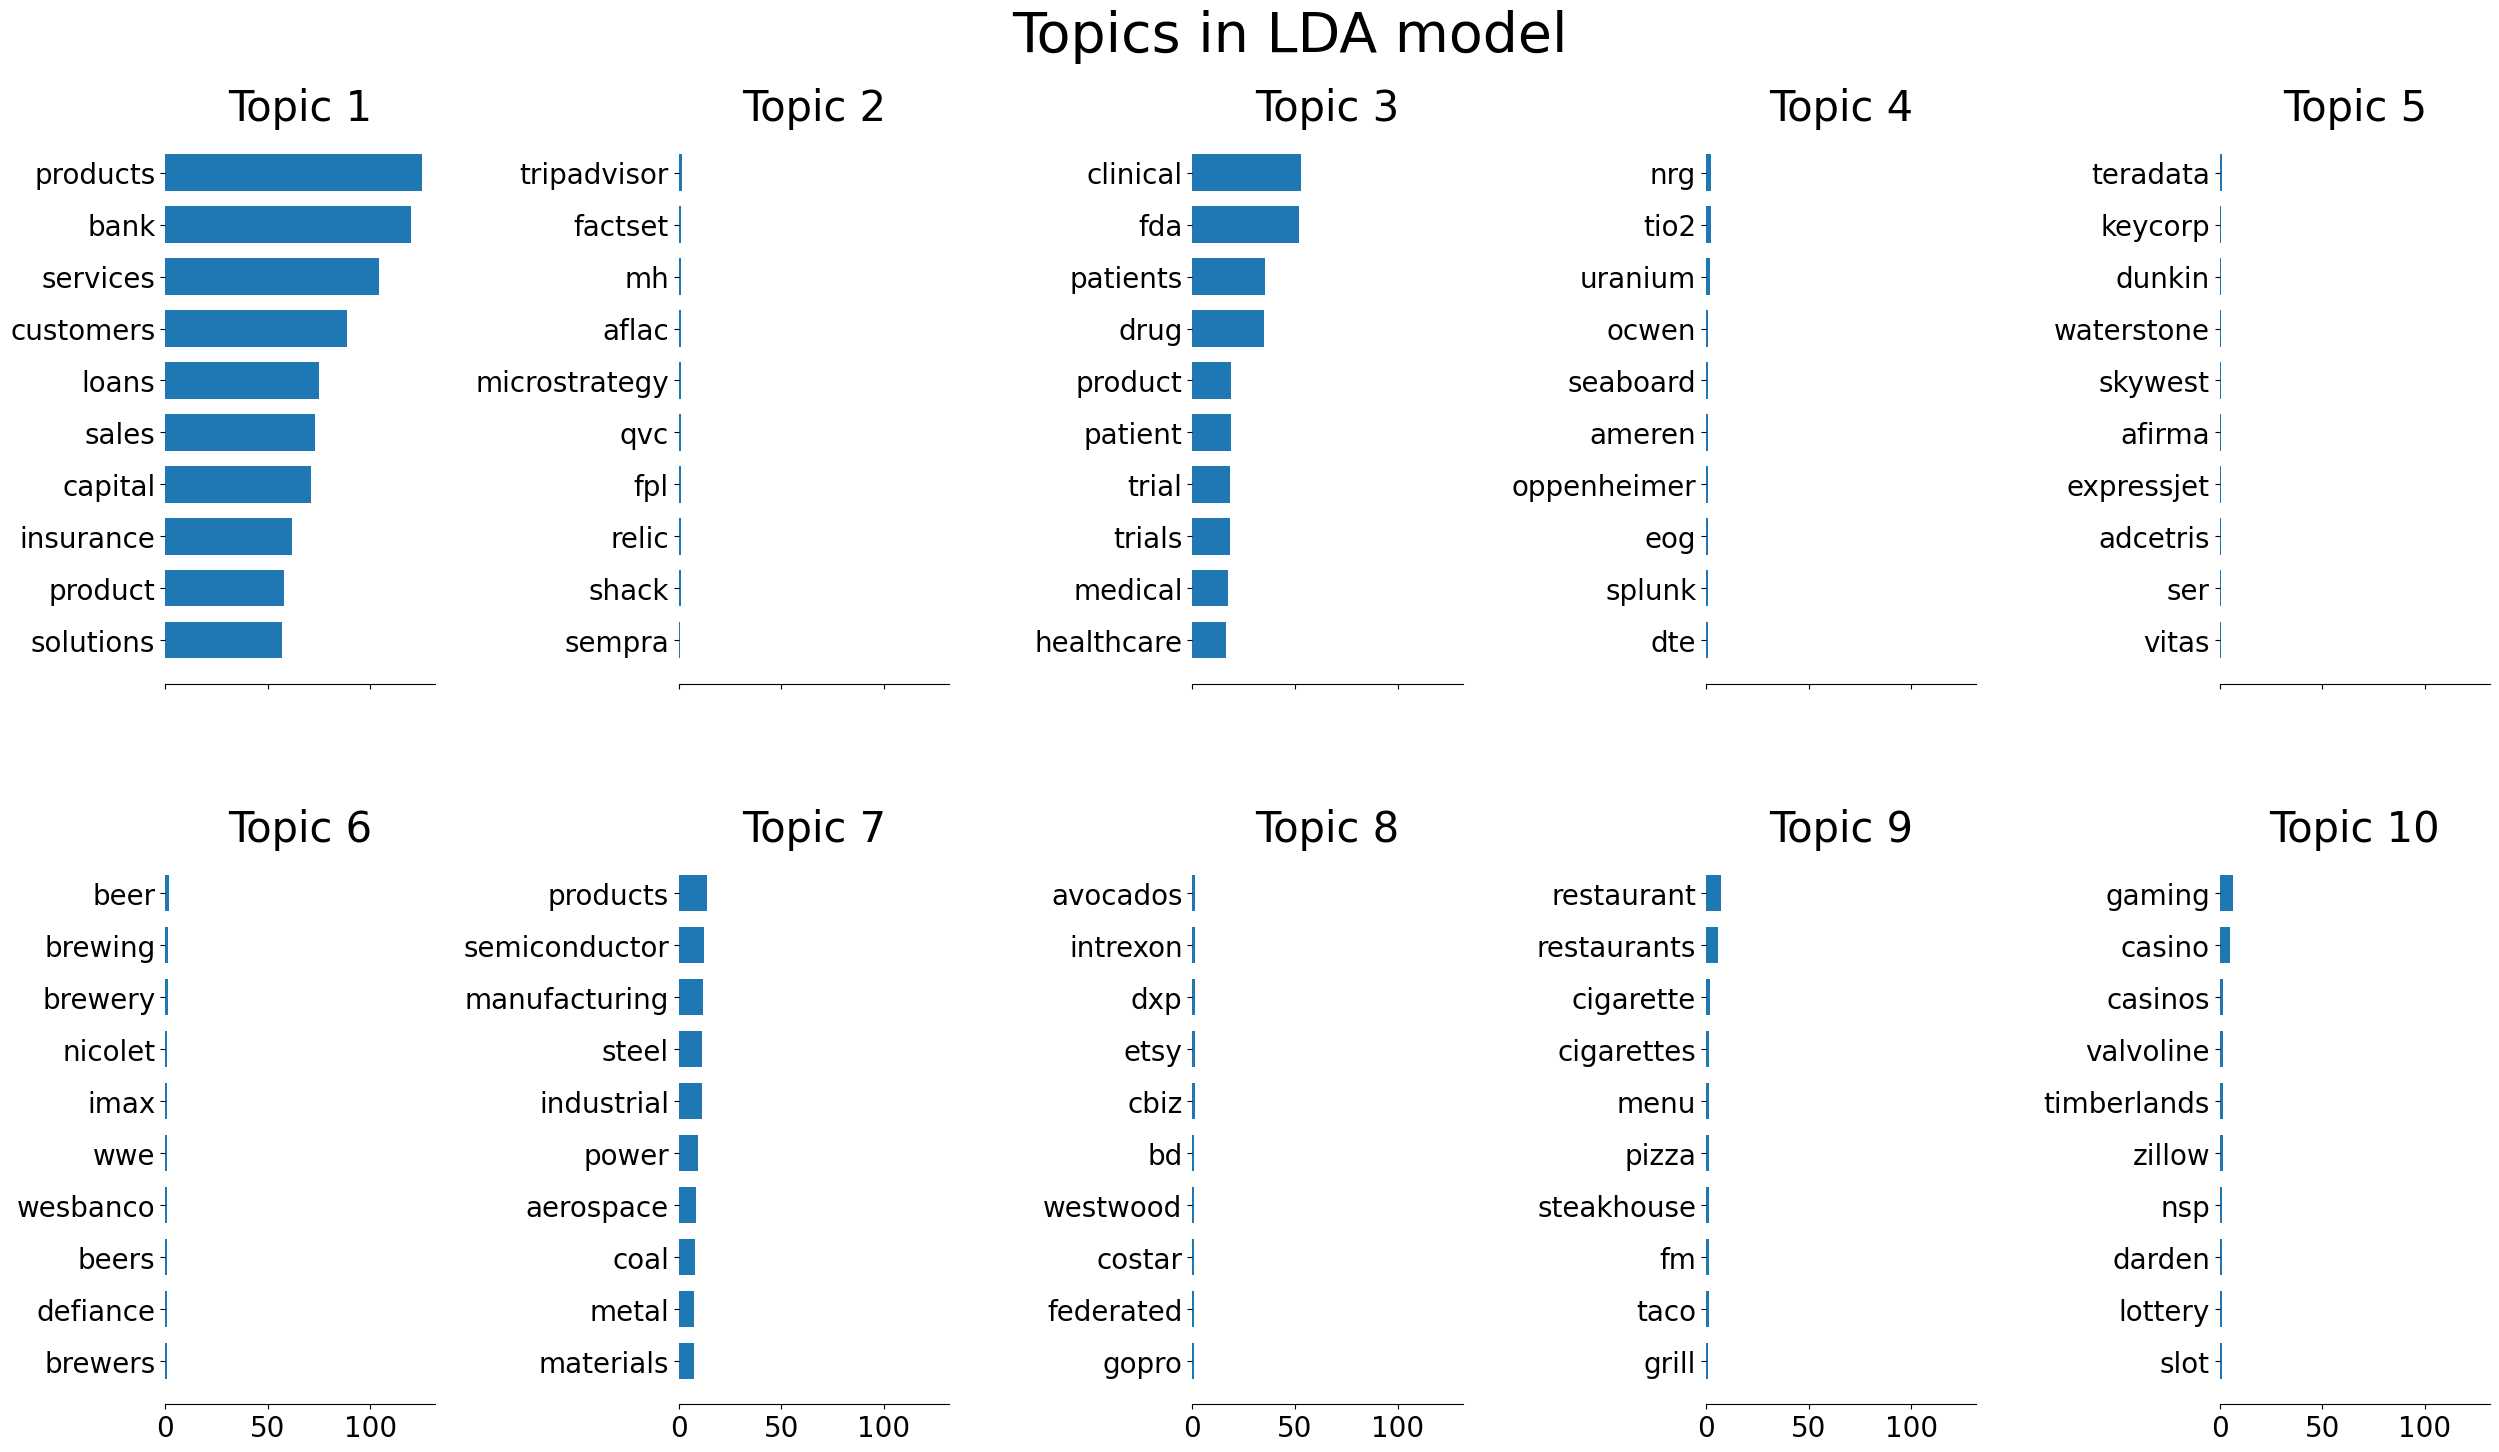

In [48]:

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

tf_feature_names = vec.get_feature_names_out()
plot_top_words(my_lda, tf_feature_names, 10, "Topics in LDA model")

# $ \\ $
# Beware


<img src="admiral-ackbar.jpg" alt="ackbar" width="800"/>

## There is a trap you can fall into: 
 - ## Run a topic model with some parameters
 - ## Look / qualitatively assess at the topics that come out
 - ## Repeat


## This typically does not lead to better understanding
# $ \\ $
# $ \\ $
# $ \\ $

<img src="shame.jpg" alt="shame" width="300"/>

# This is a shame!
## This is so much text on the internet
# $ \\ $
# $ \\ $
## Example: The C4 data set
 - ## [here](https://www.tensorflow.org/datasets/catalog/c4)
 - ## Over 1T example documents
 - ## Over 6 TB  of data
 - ## Annoying to use because of it's size

# $ \\ $
# $ \\ $
# How can we use all of this text?
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $

# Question 1: What do we `WANT` to do with it
- ## Break text into topics?
    - ### Seems a bit naive
- ## Improve representation of individual words, devoid of any context
    - ### Why?
- ## Figure out how to construct a language model
    - ## This is more fun and much more interesting
# $ \\ $
# $ \\ $

# Idea: EMBEDDINGS
 - ## Improve our token representation, perhaps including context!
 - ## Use neural nets (NN) to extend and improve (PCA, LDA)
 - ## Foundation of all modern SOTA NLP (future lectures)

# $ \\ $

## Often this is called building 'language models'

- ### We will see how to build such statistical language models (LMs) after the break
- ### Gray area between unsupervised <-> supervised

# Autoencoders


<img src="AE.png" title="Python Logo"/>

## We have't truly covered NNs quite yet
## It's a little piece of technology from the future that has suddenly landed in the here and now
# $ \\ $
## The basic idea:
- ### We take a set of inputs (tokens)
- ### We "squeeze/compress" them through a smaller layer
- ### We want the output to resemble the input!

### Autoencoders (AE) are a form of (lossy) compression. 
#### Lossy means that we lose information

In [49]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape

    self.encoder = layers.Dense(units=latent_dim,
                                activation='relu',
                               )
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

shape = x.shape[1:]
latent_dim = 32
autoencoder = Autoencoder(latent_dim, shape)

2024-10-05 15:50:10.911643: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-10-05 15:50:10.911667: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-10-05 15:50:10.911671: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-10-05 15:50:10.911684: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-05 15:50:10.911694: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### The following bit of code doesn't work on my laptop; perhaps it will work on yours!

#### It's intended to produce a visual representation of the autoencoder, we will make do with a simple summary

#### Model summary - note the very large number of parameters!

In [50]:
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [52]:
%%time
vec = TfidfVectorizer(max_features=10000, lowercase=True, stop_words="english", min_df=2,max_df=0.95)
x = vec.fit_transform(r3k_data)
x = normalize(x)

CPU times: user 5.46 s, sys: 85.6 ms, total: 5.55 s
Wall time: 5.55 s


In [53]:
%%time
x_tf = tf.convert_to_tensor(x.toarray(), name="normalized_x")
autoencoder.fit(x_tf, x_tf,
                epochs=10,
                shuffle=True,
                validation_data=(x_tf, x_tf))

Epoch 1/10


2024-10-05 15:50:16.829000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2230 - val_loss: 0.0216
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - val_loss: 0.0026
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - val_loss: 8.2306e-04
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8897e-04 - val_loss: 5.9214e-04
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.4536e-04 - val_loss: 4.5912e-04
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.4077e-04 - val_loss: 3.7221e-04
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.4283e-04 - val_loss: 3.1686e-04
Epoch 9/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.4113e-04 - val_loss: 2.7286e-04
Epoch 10/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5863e-04 - val_loss: 2.4401e-04
CPU times: user 5.71 s, sys: 4.1 s, total: 9.8 s
Wall time: 6.29 s


In [54]:
encoded_data = autoencoder.encoder(x_tf).numpy()
encoded_data.shape, x_tf.shape, x.shape

((2284, 32), TensorShape([2284, 10000]), (2284, 10000))

In [55]:
components_ae_without_stopwords = pd.DataFrame(autoencoder.layers[0].get_weights()[0], index=vec.get_feature_names_out())
assemble_components(components_ae_without_stopwords, 10, 4)

words_0  component_0       words_1  component_1     words_2  \
0     agreement     0.151556         owned     0.188815    operates   
1       segment     0.149418      believes     0.186586         gas   
2      believes     0.147778     agreement     0.183322  production   
3         world     0.147512        prices     0.182803       brand   
4    agreements     0.145481          year     0.181131       world   
5           gas     0.145414      produced     0.178648       owned   
6       million     0.143901          2016     0.177998       table   
7  consolidated     0.143717       matters     0.177714      canada   
8          note     0.143281  transmission     0.177323     million   
9  distribution     0.142786      provides     0.176995       costs   

   component_2        words_3  component_3  
0     0.154027     production     0.145479  
1     0.149854          sales     0.145435  
2     0.149397            gas     0.143259  
3     0.149054            use     0.142129  
4     0.147798       includes     0.141657  
5     0.146628  international     0.140624  
6     0.145518      operating     0.139490  
7     0.144862           2013     0.139243  
8     0.143481     statements     0.138988  
9     0.143376         report     0.138949

In [56]:
# Some common words:
interesting_words = ['loan', 'gas', 'sales', 'apple', 'bank']
ae_embedding = {}
for w in interesting_words:
    i, = np.where(vec.get_feature_names_out() == w)
    ae_embedding[w] = autoencoder.layers[0].get_weights()[0][i,:].flatten()
ae_embedding = pd.DataFrame(ae_embedding)
ae_embedding

loan       gas     sales     apple      bank
0   0.110775  0.145414  0.132079  0.051630  0.103936
1   0.096720  0.153556  0.167091  0.055831  0.087145
2   0.116428  0.149854  0.124657  0.057577  0.120163
3   0.073648  0.143259  0.145435  0.074308  0.096763
4   0.075268  0.127750  0.103851  0.043657  0.118428
5   0.077229  0.098023  0.105267  0.034253  0.113333
6   0.118913  0.122107  0.129240  0.066018  0.107621
7   0.081881  0.114344  0.101131  0.034554  0.085513
8   0.080961  0.129823  0.150654  0.036880  0.084686
9   0.079432  0.117598  0.103693  0.058632  0.102661
10  0.094826  0.135084  0.103752  0.066868  0.073775
11  0.101222  0.109518  0.130561  0.033327  0.103360
12  0.112544  0.105839  0.135849  0.047781  0.080651
13  0.112229  0.123067  0.126924  0.042162  0.115735
14  0.077476  0.103579  0.108876  0.050452  0.075751
15  0.069329  0.128553  0.102175  0.065774  0.075995
16  0.125005  0.178445  0.180824  0.082488  0.105324
17  0.103768  0.108432  0.149032  0.039811  0.080651
18  0.077545  0.109422  0.147295  0.053033  0.108225
19  0.083710  0.129051  0.113999  0.064932  0.096501
20  0.075191  0.151908  0.150380  0.075425  0.096656
21  0.093278  0.112793  0.129840  0.036001  0.115433
22  0.116754  0.107245  0.121352  0.057552  0.094080
23  0.119141  0.145922  0.146195  0.043225  0.110252
24  0.109378  0.147666  0.114210  0.041298  0.086189
25  0.115828  0.115320  0.109362  0.062018  0.091734
26  0.107488  0.148794  0.138482  0.046413  0.073293
27  0.082497  0.141015  0.129289  0.053466  0.107512
28  0.142093  0.153897  0.195113  0.050587  0.095168
29  0.085099  0.146713  0.115388  0.029312  0.095381
30  0.116873  0.129225  0.115572  0.052997  0.111284
31  0.117364  0.151520  0.157429  0.055348  0.075493

In [57]:
ae_embedding.corr()

loan       gas     sales     apple      bank
loan   1.000000  0.310205  0.462370  0.056449  0.073805
gas    0.310205  1.000000  0.538547  0.407179 -0.011636
sales  0.462370  0.538547  1.000000  0.207456 -0.028015
apple  0.056449  0.407179  0.207456  1.000000 -0.072903
bank   0.073805 -0.011636 -0.028015 -0.072903  1.000000

# $ \\ $
# $ \\ $
# This is still static text!
## No context, no sequence information
# $ \\ $
## Can we do better?
# $ \\ $
# $ \\ $
# $ \\ $
# OF COURSE! (Or, in this course!)
# $ \\ $

# Continuous Bag Of Words (CBOW)
# $ \\ $
## Look at sequences of words, drop the middle and predict it!
#
## Remove a single word from the middle of a phrase, known as the context window
## Train a model to predict the missing word
# $ \\ $
## Example: `Hold fast to dreams for if dreams die, life is a broken-winged bird that cannot fly`
# $ \\ $
<img src="cbow_example.png" alt="CBOW" width="1200"/>

## We will do a very simplified example where we ignore sentence boundaries and other non-trivial details.

In [58]:
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right - this is our context window
EMBEDDING_DIM = 300  # size of the embeddings matrix - we'll get to this in a bit

In [59]:
# Our tiny training dataset
raw_text = r3k_data[1].lower().split()
raw_text[:10]

['item',
 '1.',
 'business',
 '|',
 '---|---',
 'overview',
 'american',
 'airlines',
 'group',
 'inc.']

## Preprocess data by getting rid of symbols, etc.

In [60]:
random_state = 12345
vec = CountVectorizer(max_features=100000, lowercase=True)
x = vec.fit_transform(raw_text)
len(vec.get_feature_names_out())

1944

In [61]:
# Text preprocessing get only individual words
vocab = set(vec.get_feature_names_out())  # dedup

vocab_size = len(vocab)
vocab_size

1944

In [62]:
# we create simple mappings of word to an index of the word
word_to_ix = {word: ix for ix, word in enumerate(vocab)}
ix_to_word = {ix: word for ix, word in enumerate(vocab)}

In [63]:
clean_text = []
for s in raw_text:
    if s in word_to_ix:
        clean_text.append(s)
len(clean_text)

8458

In [64]:
' '.join(clean_text[:30])

'item business overview american airlines group delaware is holding company and its subsidiaries are american envoy aviation group piedmont and psa aag was formed in 1982 under the name amr'

In [65]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return tf.convert_to_tensor(idxs, dtype=tf.int32)

test_data = []
for i in range(CONTEXT_SIZE, len(clean_text) - CONTEXT_SIZE):
    context = [clean_text[i - 2], clean_text[i - 1], clean_text[i + 1], clean_text[i + 2]]
    target = clean_text[i]
    test_data.append((context, target))

In [66]:
# We have our [input, input, input, input, target]
# based on the context window of +2 words -2 words
# you can see how we're building words close to each other now
print(*test_data[100:120], sep="\n")

(['of', 'aag', 'us', 'airways'], 'and')
(['aag', 'and', 'airways', 'aag'], 'us')
(['and', 'us', 'aag', 'caused'], 'airways')
(['us', 'airways', 'caused', 'us'], 'aag')
(['airways', 'aag', 'us', 'airways'], 'caused')
(['aag', 'caused', 'airways', 'group'], 'us')
(['caused', 'us', 'group', 'to'], 'airways')
(['us', 'airways', 'to', 'be'], 'group')
(['airways', 'group', 'be', 'merged'], 'to')
(['group', 'to', 'merged', 'with'], 'be')
(['to', 'be', 'with', 'and'], 'merged')
(['be', 'merged', 'and', 'into'], 'with')
(['merged', 'with', 'into', 'with'], 'and')
(['with', 'and', 'with', 'aag'], 'into')
(['and', 'into', 'aag', 'as'], 'with')
(['into', 'with', 'as', 'the'], 'aag')
(['with', 'aag', 'the', 'surviving'], 'as')
(['aag', 'as', 'surviving', 'immediately'], 'the')
(['as', 'the', 'immediately', 'us'], 'surviving')
(['the', 'surviving', 'us', 'delaware'], 'immediately')


In [105]:
from tensorflow import keras
from tensorflow.keras import layers

class CBOW(keras.Model):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()

        self.embeddings = layers.Embedding(vocab_size, embedding_dim)
        self.linear1 = layers.Dense(128, activation='relu')
        self.linear2 = layers.Dense(vocab_size)  # No activation for log-softmax

    def call(self, inputs):
        embeds = keras.backend.sum(self.embeddings(inputs), axis=1)
        out = self.linear1(embeds)
        out = keras.backend.log(keras.backend.softmax(self.linear2(out)))
        return out

    def get_word_embedding(self, word):
        word = keras.backend.cast(word, dtype='int32')
        word = keras.backend.expand_dims(word, axis=0)
        return self.embeddings(word)

# Assuming you have vocab_size and EMBEDDING_DIM defined
cbow_model = CBOW(vocab_size, EMBEDDING_DIM)

# Compile the model with an optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
cbow_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # No loss_args

batch_size = 64  # Set the batch size

@tf.function(reduce_retracing=True)
def train_step(context_vectors, batch_targets):
    with tf.GradientTape() as tape:
        predictions = cbow_model(context_vectors)
        loss = tf.keras.losses.sparse_categorical_crossentropy(batch_targets, predictions, from_logits=True)

    gradients = tape.gradient(loss, cbow_model.trainable_variables)  # Gradient computation here!
    optimizer.apply_gradients(zip(gradients, cbow_model.trainable_variables))
    return loss

In [106]:
%%time
for epoch in range(18):
    total_loss = 0
    total_accuracy = 0
    # Assuming `test_data` is a list of tuples (context, target)
    for i in range(0, len(test_data), batch_size):
        batch_contexts = test_data[i:i+batch_size]
        batch_targets = []

        # Prepare batch data
        context_vectors = []
        for context, target in batch_contexts:
            context_vector = make_context_vector(context, word_to_ix)
            context_vectors.append(context_vector)
            batch_targets.append(word_to_ix[target])

        # Convert to tensors
        context_vectors = keras.backend.stack(context_vectors)
        batch_targets = keras.backend.cast(batch_targets, dtype='int32')
        batch_targets = keras.backend.reshape(batch_targets, (-1,)) 

        # Train the model on the batch
        loss = train_step(context_vectors, batch_targets)
        _, accuracy = cbow_model.evaluate(context_vectors, batch_targets, verbose=0)  # Evaluate on training set
        total_accuracy += accuracy*len(batch_targets)

        total_loss += loss[0]
    total_accuracy /= len(test_data)
    print(f"End of epoch {epoch} | Loss: {total_loss:.3f} | Accuracy: {total_accuracy:.3f}")

# You can use `model.evaluate()` to assess the model's performance after training

End of epoch 0 | Loss: 957.887 | Accuracy: 0.058
End of epoch 1 | Loss: 826.596 | Accuracy: 0.082
End of epoch 2 | Loss: 783.304 | Accuracy: 0.098
End of epoch 3 | Loss: 747.889 | Accuracy: 0.116
End of epoch 4 | Loss: 713.717 | Accuracy: 0.138
End of epoch 5 | Loss: 679.012 | Accuracy: 0.155
End of epoch 6 | Loss: 643.688 | Accuracy: 0.177
End of epoch 7 | Loss: 606.386 | Accuracy: 0.201
End of epoch 8 | Loss: 566.527 | Accuracy: 0.229
End of epoch 9 | Loss: 524.730 | Accuracy: 0.254
End of epoch 10 | Loss: 481.698 | Accuracy: 0.286
End of epoch 11 | Loss: 435.850 | Accuracy: 0.323
End of epoch 12 | Loss: 390.317 | Accuracy: 0.363
End of epoch 13 | Loss: 343.547 | Accuracy: 0.419
End of epoch 14 | Loss: 299.326 | Accuracy: 0.497
End of epoch 15 | Loss: 256.719 | Accuracy: 0.583
End of epoch 16 | Loss: 218.550 | Accuracy: 0.654
End of epoch 17 | Loss: 185.312 | Accuracy: 0.710
CPU times: user 1min 18s, sys: 20.4 s, total: 1min 39s
Wall time: 1min 28s


In [77]:
print(cbow_model.summary())

Model: "cbow_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (64, 4, 300)           │       583,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (64, 128)              │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (64, 1944)             │       250,776 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,617,514 (9.99 MB)

 Trainable params: 872,504 (3.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,745,010 (6.66 MB)

None


In [107]:
print(
    "Getting weights:\n", cbow_model.get_word_embedding(word_to_ix['statements'])
)  

Getting weights:
 tf.Tensor(
[[-1.80030823e-01  2.12942421e-01  6.52043000e-02 -2.82951985e-02
   1.04042254e-01  2.78418064e-01  1.59005702e-01 -7.48239532e-02
  -1.72924489e-01 -5.78833222e-02 -2.18596667e-01 -2.08211616e-01
   1.14577096e-02 -8.21533352e-02 -2.71220684e-01  2.88806021e-01
   3.91798392e-02  2.05560308e-02 -1.35379564e-02  1.34924173e-01
  -1.00536674e-01  1.57905012e-01 -1.79767132e-01 -1.18170075e-01
   1.41824082e-01  1.38101876e-01  7.14200959e-02 -7.47617111e-02
   3.45921479e-02  1.11675434e-01  1.36114806e-01 -2.80671448e-01
   7.60927051e-02  3.01139522e-02 -1.50020033e-01 -6.46313652e-02
   1.23506956e-01  1.03113733e-01  1.51446000e-01  3.07075143e-01
  -3.47137377e-02  6.08909829e-03  5.03234752e-03  6.36930019e-02
  -1.25904292e-01  4.94612195e-02 -2.64920741e-02  2.71171898e-01
   1.34433746e-01 -1.68756083e-01  2.68636853e-03  7.24345306e-03
  -8.71567801e-02  1.06510252e-01 -1.91813529e-01  7.63194785e-02
  -2.50140011e-01 -6.42632991e-02  6.85330555e-

In [111]:
i_context = 490
print(test_data[i_context])
context= test_data[i_context][0]
context_vector = make_context_vector(context, word_to_ix)
target = test_data[i_context][1]


(['are', 'an', 'component', 'of'], 'integral')


In [112]:
fubar = keras.backend.softmax(cbow_model.linear2(cbow_model.linear1(keras.backend.sum(cbow_model.get_word_embedding(context_vector), axis=1))))

In [113]:
ix_to_word[np.argmax(fubar, axis=1)[0]]

'integral'